## A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [4]:
data = pd.read_csv("D:\ExcelR_Assig_PDF\HYpothesis\Cutlets.csv")
data.head(12)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [5]:
data.describe(include='all')

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
Unit_A=data['Unit A'].mean()
Unit_B=data['Unit B'].mean()

print('Unit A Mean = ',Unit_A, '\nUnit B Mean = ',Unit_B)
print('Unit A Mean > Unit B Mean = ',Unit_A>Unit_B)

Unit A Mean =  7.01909142857143 
Unit B Mean =  6.964297142857142
Unit A Mean > Unit B Mean =  True


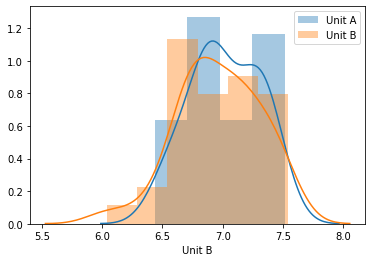

In [7]:
sns.distplot(data['Unit A'])
sns.distplot(data['Unit B'])
plt.legend(['Unit A','Unit B'])

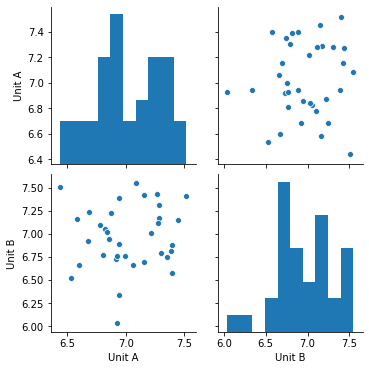

In [18]:
sns.pairplot(data=data);

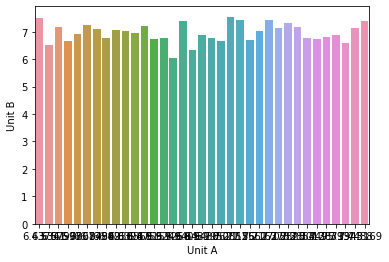

In [10]:
sns.barplot(x="Unit A", y="Unit B", data=data);

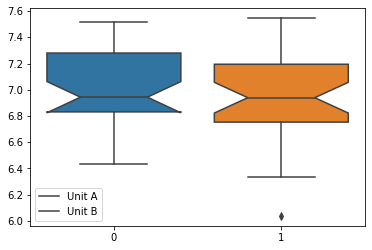

In [13]:
sns.boxplot(data=[data['Unit A'],data['Unit B']],notch=True)
plt.legend(['Unit A','Unit B'])

In [14]:
alpha=0.05
UnitA=pd.DataFrame(data['Unit A'])
UnitB=pd.DataFrame(data['Unit B'])
print(UnitA,UnitB)

    Unit A
0   6.8090
1   6.4376
2   6.9157
3   7.3012
4   7.4488
5   7.3871
6   6.8755
7   7.0621
8   6.6840
9   6.8236
10  7.3930
11  7.5169
12  6.9246
13  6.9256
14  6.5797
15  6.8394
16  6.5970
17  7.2705
18  7.2828
19  7.3495
20  6.9438
21  7.1560
22  6.5341
23  7.2854
24  6.9952
25  6.8568
26  7.2163
27  6.6801
28  6.9431
29  7.0852
30  6.7794
31  7.2783
32  7.1561
33  7.3943
34  6.9405     Unit B
0   6.7703
1   7.5093
2   6.7300
3   6.7878
4   7.1522
5   6.8110
6   7.2212
7   6.6606
8   7.2402
9   7.0503
10  6.8810
11  7.4059
12  6.7652
13  6.0380
14  7.1581
15  7.0240
16  6.6672
17  7.4314
18  7.3070
19  6.7478
20  6.8889
21  7.4220
22  6.5217
23  7.1688
24  6.7594
25  6.9399
26  7.0133
27  6.9182
28  6.3346
29  7.5459
30  7.0992
31  7.1180
32  6.6965
33  6.5780
34  7.3875


In [15]:
tStat,pValue =sp.stats.ttest_ind(UnitA,UnitB)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:[0.47223947] T-Statistic:[0.72286887]


In [16]:
if pValue <0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we accept null hypothesis


## A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch. Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level. 

In [10]:
LabTAT =pd.read_csv('D:\ExcelR_Assig_PDF\HYpothesis\LabTAT.csv')
LabTAT.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [11]:
LabTAT.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [12]:
Lab_1=LabTAT['Laboratory 1'].mean()
Lab_2=LabTAT['Laboratory 2'].mean()
Lab_3=LabTAT['Laboratory 3'].mean()
Lab_4=LabTAT['Laboratory 4'].mean()

print('Laboratory 1 Mean = ',Lab_1)
print('Laboratory 2 Mean = ',Lab_2)
print('Laboratory 3 Mean = ',Lab_3)
print('Laboratory 4 Mean = ',Lab_4)

Laboratory 1 Mean =  178.36158333333339
Laboratory 2 Mean =  178.9029166666668
Laboratory 3 Mean =  199.91325000000003
Laboratory 4 Mean =  163.6827499999999


In [13]:
print('Lab_1 > Lab_2 = ',Lab_1 > Lab_2)
print('Lab_2 > Lab_3 = ',Lab_2 > Lab_3)
print('Lab_3 > Lab_4 = ',Lab_3 > Lab_4)
print('Lab_4 > Lab_1 = ',Lab_4 > Lab_1)

Lab_1 > Lab_2 =  False
Lab_2 > Lab_3 =  False
Lab_3 > Lab_4 =  True
Lab_4 > Lab_1 =  False


#### The Null and Alternative Hypothesis

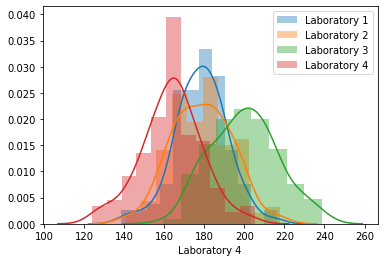

In [7]:
sns.distplot(LabTAT['Laboratory 1'])
sns.distplot(LabTAT['Laboratory 2'])
sns.distplot(LabTAT['Laboratory 3'])
sns.distplot(LabTAT['Laboratory 4'])
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])

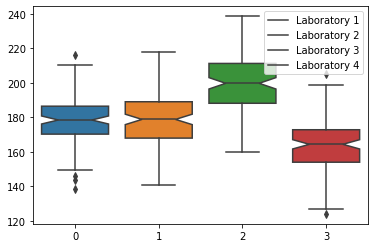

In [9]:
sns.boxplot(data=[LabTAT['Laboratory 1'],LabTAT['Laboratory 2'],LabTAT['Laboratory 3'],LabTAT['Laboratory 4']],notch=True)
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])


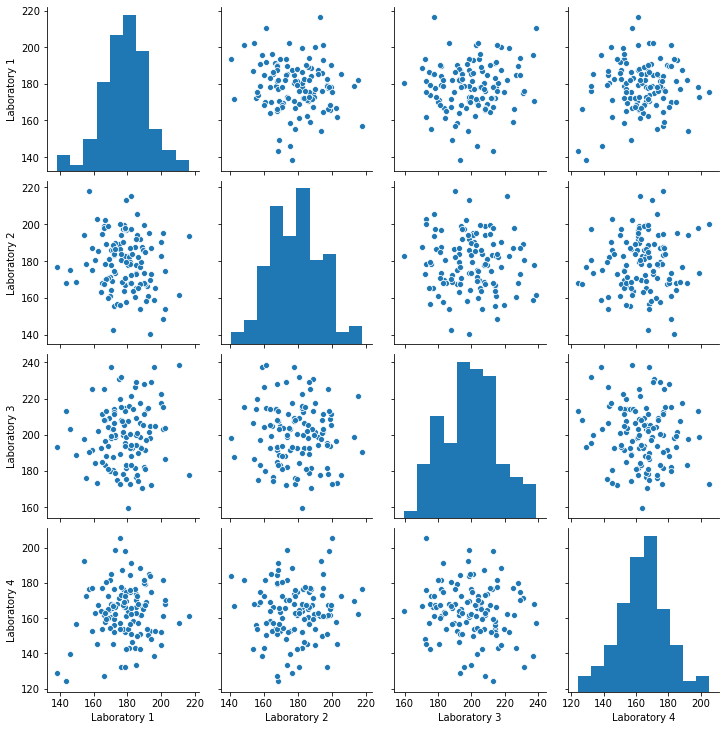

In [14]:
sns.pairplot(data=LabTAT);

In [20]:
alpha=0.05
Lab1=pd.DataFrame(LabTAT['Laboratory 1'])
Lab2=pd.DataFrame(LabTAT['Laboratory 2'])
Lab3=pd.DataFrame(LabTAT['Laboratory 3'])
Lab4=pd.DataFrame(LabTAT['Laboratory 4'])
print(Lab1,Lab1,Lab3,Lab4)

     Laboratory 1
0          185.35
1          170.49
2          192.77
3          177.33
4          193.41
..            ...
115        178.49
116        176.08
117        202.48
118        182.40
119        182.09

[120 rows x 1 columns]      Laboratory 1
0          185.35
1          170.49
2          192.77
3          177.33
4          193.41
..            ...
115        178.49
116        176.08
117        202.48
118        182.40
119        182.09

[120 rows x 1 columns]      Laboratory 3
0          176.70
1          198.45
2          201.23
3          199.61
4          204.63
..            ...
115        193.80
116        215.25
117        203.99
118        194.52
119        221.49

[120 rows x 1 columns]      Laboratory 4
0          166.13
1          160.79
2          185.18
3          176.42
4          152.60
..            ...
115        172.68
116        177.64
117        170.27
118        150.87
119        162.21

[120 rows x 1 columns]


In [21]:
tStat, pvalue = sp.stats.f_oneway(Lab1,Lab2,Lab3,Lab4)
print("P-value:{0} T-Statistic:{1}".format(pvalue,tStat))

P-value:[2.11567089e-57] T-Statistic:[118.70421654]


In [22]:
if pvalue < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we reject null hypothesis


## Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions

In [4]:
BuyerRatio =pd.read_csv('D:\ExcelR_Assig_PDF\HYpothesis\BuyerRatio.csv')
BuyerRatio.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [5]:
BuyerRatio.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [6]:
East=BuyerRatio['East'].mean()
West=BuyerRatio['West'].mean()
North=BuyerRatio['North'].mean()
South=BuyerRatio['South'].mean()

print('East Mean = ',East)
print('West Mean = ',West)
print('North Mean = ',North)
print('South Mean = ',South)

East Mean =  242.5
West Mean =  832.5
North Mean =  743.5
South Mean =  410.0


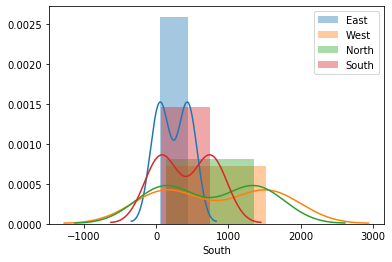

In [7]:
sns.distplot(BuyerRatio['East'])
sns.distplot(BuyerRatio['West'])
sns.distplot(BuyerRatio['North'])
sns.distplot(BuyerRatio['South'])
plt.legend(['East','West','North','South'])

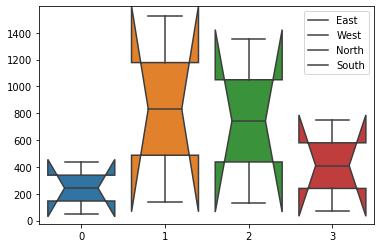

In [27]:
sns.boxplot(data=[BuyerRatio['East'],BuyerRatio['West'],BuyerRatio['North'],BuyerRatio['South']],notch=True)
plt.legend(['East','West','North','South'])

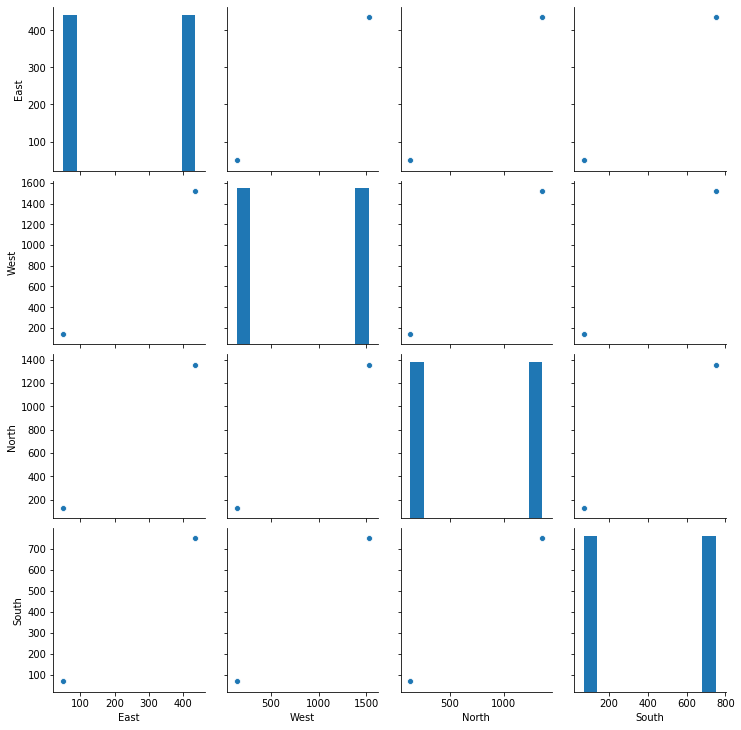

In [8]:
sns.pairplot(data=BuyerRatio);

In [28]:
alpha=0.05
Male = [50,142,131,70]
Female=[435,1523,1356,750]
Sales=[Male,Female]
print(Sales)

[[50, 142, 131, 70], [435, 1523, 1356, 750]]


In [29]:
chiStats = sp.stats.chi2_contingency(Sales)
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')
if chiStats[1] < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

Test t=1.595946 p-value=0.660309
Interpret by p-Value
we accept null hypothesis


In [30]:
alpha = 0.05
critical_value = sp.stats.chi2.ppf(q = 1 - alpha,df=chiStats[2])
observed_chi_val = chiStats[0]
print('Interpret by critical value')
if observed_chi_val <= critical_value:
    
    print ('Null hypothesis cannot be rejected (variables are not related)')
else:

    print ('Null hypothesis cannot be excepted (variables are not independent)')

Interpret by critical value
Null hypothesis cannot be rejected (variables are not related)


## TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

In [31]:
Customer = pd.read_csv('D:\ExcelR_Assig_PDF\HYpothesis\Costomer+OrderForm.csv')
Customer.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [32]:
Customer.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [33]:
Phillippines_value=Customer['Phillippines'].value_counts()
Indonesia_value=Customer['Indonesia'].value_counts()
Malta_value=Customer['Malta'].value_counts()
India_value=Customer['India'].value_counts()
print(Phillippines_value)
print(Indonesia_value)
print(Malta_value)
print(India_value)

Error Free    271
Defective      29
Name: Phillippines, dtype: int64
Error Free    267
Defective      33
Name: Indonesia, dtype: int64
Error Free    269
Defective      31
Name: Malta, dtype: int64
Error Free    280
Defective      20
Name: India, dtype: int64


In [34]:
chiStats = sp.stats.chi2_contingency([[271,267,269,280],[29,33,31,20]])
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')
if chiStats[1] < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

Test t=3.858961 p-value=0.277102
Interpret by p-Value
we accept null hypothesis
